# Hertzian Dipole

Τhe electric field radiated by a Hertzian dipole is written as

\begin{align}
\vec{E} = 2\eta\,I_o\, \Delta{z} \, \frac{e^{-jkr}}{4 \pi r}\,\cos{\theta}\left[\frac{1}{r} - \frac{j}{kr^2} \right]\,\hat{r} + j\eta k\, I_o\, \Delta{z}\,\frac{e^{-jkr}}{4 \pi r}\,\sin{\theta}\,\left[1+\frac{1}{jkr} - \frac{1}{(kr)^2} \right]\hat{\theta}\hspace{0.5in} \text{(V/m)}
\end{align}

Begin by defining necessary functions

In [1]:
from scipy.constants import pi, mu_0, epsilon_0, c
from numpy import sqrt, sin, exp


def electric_field(relative_permittivity, relative_permeability, frequency, current, length, r, theta):
    """
    Calculate the electric far field for the Hertzian dipole.
    :param relative_permittivity: The relative permittivity.
    :param relative_permeability: The relative permeability.
    :param frequency: The operating frequency (Hz).
    :param current: The current on the dipole (A).
    :param length: The length of the dipole (m).
    :param r: The range to the field point (m).
    :param theta: The angle to the field point (radians).
    :return: The electric far field for the Hertzian dipole (theta-hat) (V/m).
    """
    # Calculate the angular frequency and material parameters
    omega = 2.0 * pi * frequency
    mu = relative_permeability * mu_0
    epsilon = relative_permittivity * epsilon_0

    # Calculate the wavenumber
    k = omega / c

    # Calculate the impedance
    eta = sqrt(mu / epsilon)

    return 1j * eta * k * current * length * exp(-1j * k * r) * sin(theta) / (4.0 * pi * r)


def magnetic_field(frequency, current, length, r, theta):
    """
    Calculate the electric far field for the Hertzian dipole.
    :param frequency: The operating frequency (Hz).
    :param current: The current on the dipole (A).
    :param length: The length of the dipole (m).
    :param r: The range to the field point (m).
    :param theta: The angle to the field point (radians).
    :return: The electric far field for the Hertzian dipole (phi-hat) (V/m).
    """
    # Calculate the angular frequency and material parameters
    omega = 2.0 * pi * frequency

    # Calculate the wavenumber
    k = omega / c

    return 1j * k * current * length * exp(-1j * k * r) * sin(theta) / (4.0 * pi * r)


def power_density(relative_permittivity, relative_permeability, frequency, current, length, r, theta):
    """
    Calculate the power density radiated by the Hertzian dipole.
    :param relative_permittivity: The relative permittivity.
    :param relative_permeability: The relative permeability.
    :param frequency: The operating frequency (Hz).
    :param current: The current on the dipole (A).
    :param length: The length of the dipole (m).
    :param r: The range to the field point (m).
    :param theta: The angle to the field point (radians).
    :return: The power density radiated by the Hertzian dipole (W/m^2).
    """
    # Calculate the angular frequency and material parameters
    omega = 2.0 * pi * frequency
    mu = relative_permeability * mu_0
    epsilon = relative_permittivity * epsilon_0

    # Calculate the wavenumber
    k = omega / c

    # Calculate the impedance
    eta = sqrt(mu / epsilon)

    return 0.5 * eta * (k * current * length * sin(theta) / (4.0 * pi * r)) ** 2


def total_radiated_power(relative_permittivity, relative_permeability, frequency, current, length):
    """
    Calculate the total power radiated by the Hertzian dipole.
    :param relative_permittivity: The relative permittivity.
    :param relative_permeability: The relative permeability.
    :param frequency: The operating frequency (Hz).
    :param current: The current on the dipole (A).
    :param length: The length of the dipole (m).
    :return: The total power radiated byt the Hertzian dipole (W).
    """
    # Calculate the material parameters
    mu = relative_permeability * mu_0
    epsilon = relative_permittivity * epsilon_0

    # Calculate the wavelength
    wavelength = c / frequency

    # Calculate the impedance
    eta = sqrt(mu / epsilon)

    return eta * pi / 3.0 * (current * length / wavelength) ** 2


def radiation_intensity(relative_permittivity, relative_permeability, frequency, current, length, theta):
    """
    Calculate the radiation intensity for the Hertzian dipole.
    :param relative_permittivity: The relative permittivity.
    :param relative_permeability: The relative permeability.
    :param frequency: The operating frequency (Hz).
    :param current: The current on the dipole (A).
    :param length: The length of the dipole (m).
    :param theta: The angle to the field point (radians).
    :return: The radiation intensity for the Hertzian dipole (W/steradian).
    """
    # Calculate the angular frequency and material parameters
    omega = 2.0 * pi * frequency
    mu = relative_permeability * mu_0
    epsilon = relative_permittivity * epsilon_0

    # Calculate the wavenumber
    k = omega / c

    # Calculate the impedance
    eta = sqrt(mu / epsilon)

    return 0.5 * eta * (k * current * length * sin(theta) / (4.0 * pi)) ** 2


def directivity(relative_permittivity, relative_permeability, frequency, current, length, theta):
    """
    Calculate the directivity for the Hertzian dipole.
    :param relative_permittivity: The relative permittivity.
    :param relative_permeability: The relative permeability.
    :param frequency: The operating frequency (Hz).
    :param current: The current on the dipole (A).
    :param length: The length of the dipole (m).
    :param theta: The angle to the field point (radians).
    :return: THe directivity of the Hertzian dipole.
    """
    # Get the total radiated power
    power_radiated = total_radiated_power(relative_permittivity, relative_permeability, frequency, current, length)

    return 4.0 * pi * radiation_intensity(relative_permittivity, relative_permeability,frequency, current, length, theta) / power_radiated


For plotting the antenna patterns, the angle will be set from 0 to 2 $\pi$ using the `linspace` routine from `scipy`

In [2]:
from numpy import linspace

In [3]:
theta = linspace(0, 2.0 * pi, 256)

Set the relative permittivity, relative permeability, frequency (Hz), current (A), length (m), and distance (m)

In [4]:
relative_permittivity = 1.0

relative_permeability = 1.0

frequency = 1e6

current = 1

length = 0.1

r = 1e6

Set up the keyword args

In [5]:
kwargs = {'relative_permittivity': relative_permittivity,

          'relative_permeability': relative_permeability,

          'frequency': frequency,

          'current': current,

          'length': length,

          'r': r,

          'theta': theta}

Calculate the electric field (V/m)

In [6]:
electric_field = electric_field(**kwargs)

Import the `matplotlib` routines

In [7]:
from matplotlib import pyplot as plt

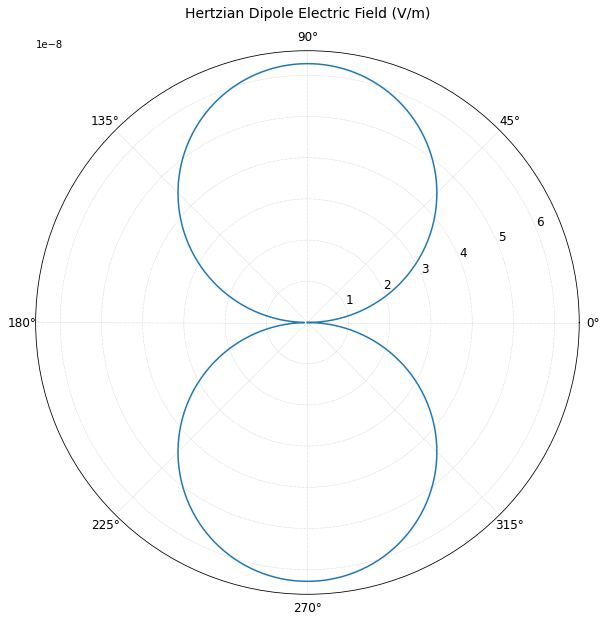

In [8]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.polar(theta, abs(electric_field))


# Set the plot title and labels

plt.title('Hertzian Dipole Electric Field (V/m)', size=14)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)

The magnetic field radiated by a Hertzian dipole is written as (Equation 4.6)

\begin{equation}
    \vec{H} =  I_o \,\Delta z \, \sin{\theta}\, \frac{e^{-jkr}}{4 \pi r} \left[ jk + \frac{1}{r} \right] \, \hat{\phi}\hspace{0.5in} \text{(A/m)}
\end{equation}

Keyword args are slightly different for the magnetic field

In [9]:
kwargsH = {'frequency': frequency,

           'current': current,

           'length': length,

           'r': r,

           'theta': theta}

Calculate the magnetic field (A/m)

In [10]:
magnetic_field = magnetic_field(**kwargsH)

`matplotlib` is imported so just create the plot

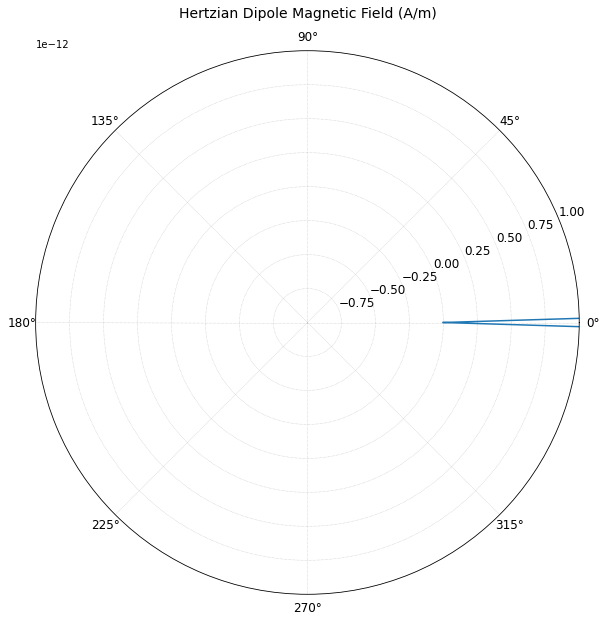

In [11]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


 # Display the results

plt.polar(theta, abs(magnetic_field))



# Set the plot title and labels

plt.title('Hertzian Dipole Magnetic Field (A/m)', size=14)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)

The power density radiated by the Hertzian dipole is written as (Equation 4.12)

\begin{equation}\label{eq:hertzian_poynting_vector2}
    \vec{P}_d = \frac{\eta}{2}\, \Bigg[ \frac{k\, I_o\, \Delta{z}}{4\pi r} \sin{\theta}\Bigg]^2\, \hat{r} \hspace{0.5in} \text{(W/m\textsuperscript{2})}
\end{equation}

Calculate the power density (Watts/m^2)

In [12]:
power_density = power_density(**kwargs)

Display the results using `matplotlib`

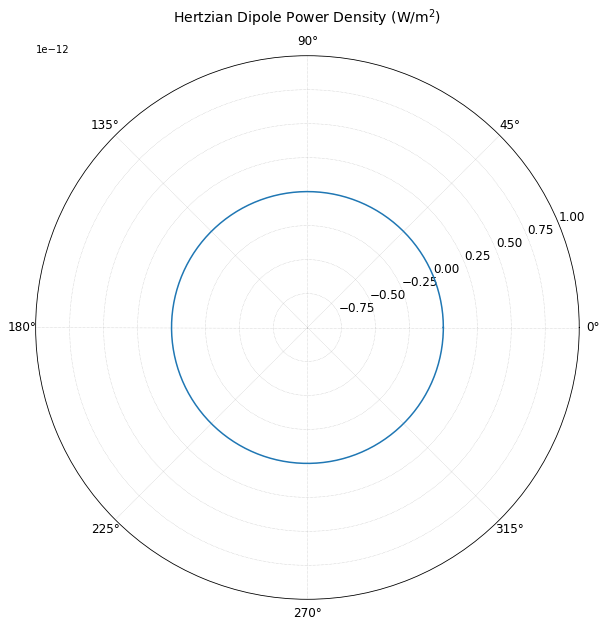

In [13]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.polar(theta, power_density)


# Set the plot title and labels

plt.title('Hertzian Dipole Power Density (W/m$^2$)', size=14)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)

Set up the keyword args

In [14]:
kwargs = {'relative_permittivity': relative_permittivity,

          'relative_permeability': relative_permeability,

          'frequency': frequency,

          'current': current,

          'length': length,

          'theta': theta}

The radiation intensity is written as (Equation 4.17)

\begin{equation}
    U(\theta,\phi) = \frac{\eta}{2}\,\left[ \frac{k\,I_o\,\Delta{z}}{4\pi}\,\sin{\theta}\right]^2  \hspace{0.5in} \text{(W/sr)}
\end{equation}

Calculate the radiation intensity (W/sr)

In [15]:
radiation_intensity = radiation_intensity(**kwargs)

Display the results using `matplotlib`

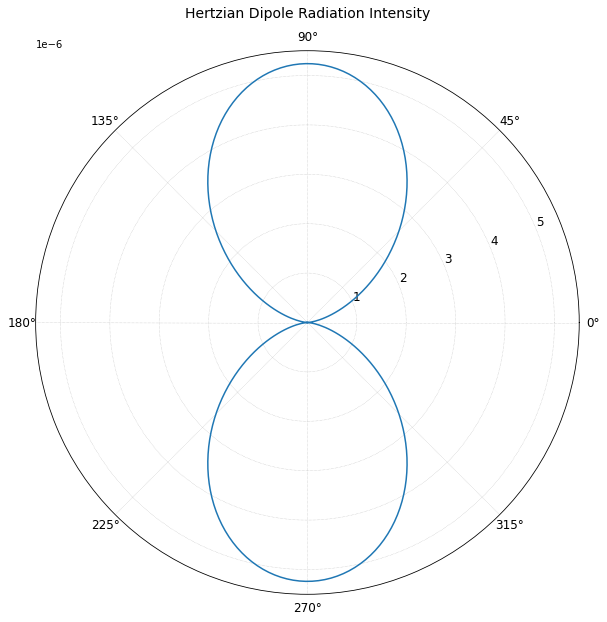

In [16]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.polar(theta, radiation_intensity, '')


# Set the plot title and labels

plt.title('Hertzian Dipole Radiation Intensity', size=14)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)

The directivity of a Hertzian dipole is written as (Equation 4.18)

\begin{equation}
    D(\theta,\phi) = \frac{4\pi\,U(\theta,\phi)}{P_{rad}} = \frac{3}{2}\,\sin^2{\theta}
\end{equation}

Calculate the directivity

In [17]:
directivity = directivity(**kwargs)

TypeError: ignored

Display the results using `matplotlib`

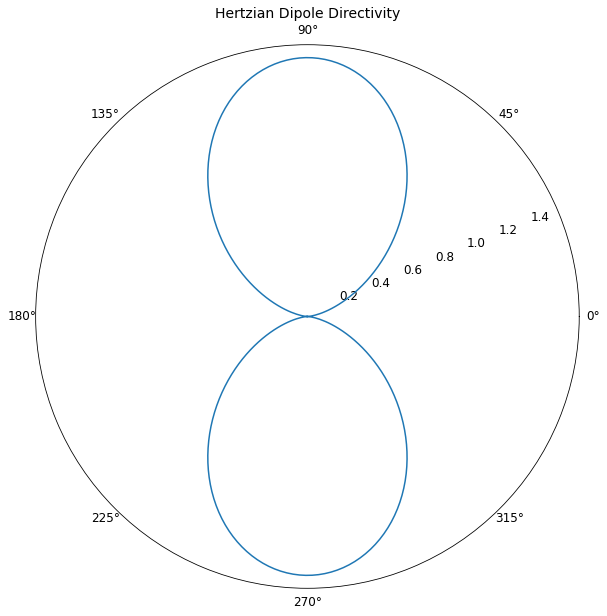

In [ ]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.polar(theta, directivity, '')


# Set the plot title and labels

plt.title('Hertzian Dipole Directivity', size=14)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)

The total power radiated by the Hertzian dipole is written as (Equation 4.13)

\begin{equation}\label{eq:hertzian_power_density}
    P_{rad} = \int\limits_{0}^{\pi}\int\limits_{0}^{2\pi} \vec{P}_d\cdot r^2 \sin{\theta}\,d\theta\,d\phi\,\hat{r}\hspace{0.5in} \text{(W)}
\end{equation}

Calculate and display the total radiated power (W)

Set up the keyword args

In [ ]:
kwargs = {'relative_permittivity': relative_permittivity,

          'relative_permeability': relative_permeability,

          'frequency': frequency,

          'current': current,

          'length': length}

In [ ]:
total_radiated_power = total_radiated_power(**kwargs)

print('{:.3e}'.format(total_radiated_power))

4.390e-05


# Power Density
***

The power density at a target at a given distance is expressed as (Equation 4.22)

$$
P_d = \frac{P_{in}\,G(\theta,\phi)}{4 \pi r^2} \hspace{0.5in} \text{(W/m}^2\text{)}
$$
***

Begin by getting the library path

Set the target minimum and maximum range (m)

In [24]:
target_min_range = 1e3

target_max_range = 10e3

Import the `linspace` routine from `scipy` for the target range array

In [25]:
from numpy import linspace

target_range = linspace(target_min_range, target_max_range, 2000)

Set the radar antenna gain (dB) and peak power (W)

In [26]:
antenna_gain = 10.0

peak_power = 50e3

Set up the keyword args

In [27]:
kwargs = {'target_range': target_range,

          'peak_power': peak_power,

          'antenna_gain': 10.0 ** (antenna_gain / 10.0)}

Import the `power_density` routine

In [40]:
from scipy.constants import c, pi, Boltzmann as k


def radar_range_power_density(peak_power, antenna_gain, target_range):
    """
    Calculate the power density at a point in space.
    :param peak_power: The peak transmitted power (W).
    :param antenna_gain: The gain of the transmitting antenna.
    :param target_range: The target distance from the transmitting antenna (m).
    :return: The power density at the target (W/m^2).
    """
    return peak_power * antenna_gain / (4.0 * pi * target_range ** 2)


def radar_range_power_at_radar(peak_power, antenna_gain, target_range, frequency, target_rcs):
    """
    Calculate the power at the radar.
    :param peak_power: The peak transmitted power (W).
    :param antenna_gain: The gain of the transmitting antenna.
    :param target_range: The target distance from the transmitting antenna (m).
    :param frequency: The operating frequency (Hz).
    :param target_rcs: The target radar cross section (m^2).
    :return: The power at the radar (W).
    """
    # Calculate the wavelength
    wavelength = c / frequency

    return (peak_power * antenna_gain ** 2 * wavelength ** 2 * target_rcs) / ((4.0 * pi) ** 3 * target_range ** 4)


def radar_range_minimum_detectable_signal(system_temperature, bandwidth, noise_factor, losses, signal_to_noise):
    """
    Calculate the minimum detectable signal based upon the SNR at the output of the receiver.
    :param system_temperature: The system temperature (K).
    :param bandwidth: The operating bandwidth (Hz).
    :param noise_factor: The receiver noise factor.
    :param losses: The system losses.
    :param signal_to_noise: The minimum output signal to noise ratio.
    :return: The minimum detectable signal (W).
    """
    return k * system_temperature * bandwidth * noise_factor * losses * signal_to_noise


def radar_range_maximum_range(system_temperature, bandwidth, noise_factor, losses, signal_to_noise, peak_power, antenna_gain,
                  frequency, target_rcs):
    """
    Calculate the maximum range that the radar can detect the target.
    :param system_temperature: The system temperature (K).
    :param bandwidth: The operating bandwidth (Hz).
    :param noise_factor: The receiver noise factor.
    :param losses: The system losses.
    :param signal_to_noise: The operating signal to noise ratio.
    :param peak_power: The peak transmitted power (W).
    :param antenna_gain: The gain of the transmitting antenna.
    :param frequency: The operating frequency (Hz).
    :param target_rcs: The target radar cross section (m^2).
    :return: The maximum range at which a target can be detected (m).
    """
    # First, calculate the minimum detectable signal
    min_signal = radar_range_minimum_detectable_signal(system_temperature, bandwidth, noise_factor, losses, signal_to_noise)

    return ((peak_power * antenna_gain ** 2 * (c / frequency) ** 2 * target_rcs) /
            ((4.0 * pi) ** 3 * min_signal)) ** 0.25


def radar_range_output_snr(system_temperature, bandwidth, noise_factor, losses, peak_power, antenna_gain, frequency, target_rcs,
               target_range):
    """
    Calculate the signal to noise ratio at the output of the receiver.
    :param system_temperature: The system temperature (K).
    :param bandwidth: The operating bandwidth (Hz).
    :param noise_factor: The receiver noise factor.
    :param losses: The system losses.
    :param peak_power: The peak transmitted power (W).
    :param antenna_gain: The gain of the transmitting antenna.
    :param frequency: The operating frequency (Hz).
    :param target_rcs: The target radar cross section (m^2).
    :param target_range: The target distance from the transmitting antenna (m).
    :return: The signal to noise ratio at the output of the receiver.
    """
    return (peak_power * antenna_gain ** 2 * (c / frequency) ** 2 * target_rcs) / \
           ((4.0 * pi) ** 3 * k * system_temperature * bandwidth * noise_factor * losses * target_range ** 4)


def radar_range_loop_gain(reference_range, reference_rcs, reference_snr):
    """
    Calculate the loop gain given the reference range information.
    :param reference_range: Reference range for the radar (m).
    :param reference_rcs: Reference radar cross section for the radar (m^2).
    :param reference_snr: Reference signal to noise ratio for the radar.
    :return: The loop gain for the radar.
    """
    return reference_range ** 4 * reference_snr / reference_rcs


Calculate the power density at the target (W/m^2)

In [30]:
pd = radar_range_power_density(**kwargs)

Import the `matplotlib` routines

In [31]:
from matplotlib import pyplot as plt

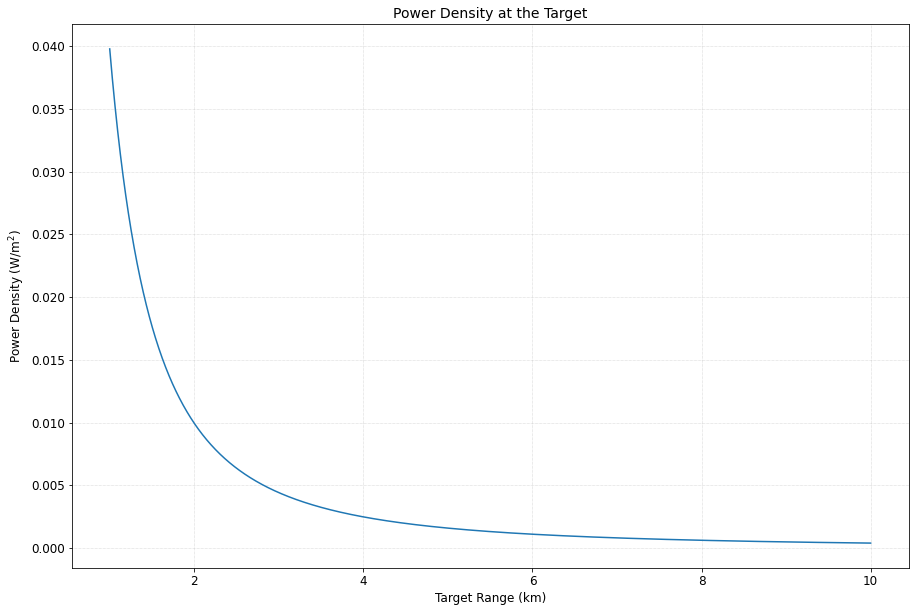

In [32]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.plot(target_range / 1.0e3, pd)


 # Set the plot title and labels

plt.title('Power Density at the Target', size=14)

plt.xlabel('Target Range (km)', size=12)

plt.ylabel('Power Density (W/m$^2$)', size=12)


 # Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)

# Maximum Detection Range
***

The maximum detection range is given by (Equation 4.36)

$$
r_{max} = \left[ \frac{P_t\,G^2\,\lambda^2\,\sigma}{(4\pi)^3\,k\,T_0\,B\,F\,L\,({SNR}_o)_{min}} \right]^{1/4} \hspace{0.5in} \text{(m)}
$$
***

Begin by getting the library path

In [34]:
from numpy import linspace

Set up the signal to noise ratio array (dB)

In [35]:
signal_to_noise = linspace(5, 25, 2000)

Set the noise figure (dB)

In [36]:
noise_figure = 3.0

Set the losses, antenna gain and target RCS

In [37]:
losses       = 3.0    # dB
antenna_gain = 20.0   # dB
target_rcs   = -10.0  # dBsm

Set up the input args

In [38]:
kwargs = {'signal_to_noise': 10.0 ** (signal_to_noise / 10.0),
          'system_temperature': 290,
          'bandwidth': 100e3,
          'noise_factor': 10.0 ** (noise_figure / 10.0),
          'losses': 10.0 ** (losses / 10.0),
          'peak_power': 50e3,
          'antenna_gain': 10.0 ** (antenna_gain / 10.0),
          'frequency': 100e6,
          'target_rcs': 10.0 ** (target_rcs / 10.0)}

Import the `maximum_range` routine to perform the calculation

In [41]:
max_range = radar_range_maximum_range(**kwargs)

Import the `matplotlib` plotting routines

In [42]:
from matplotlib import pyplot as plt

Plot the resulting maximum detection range

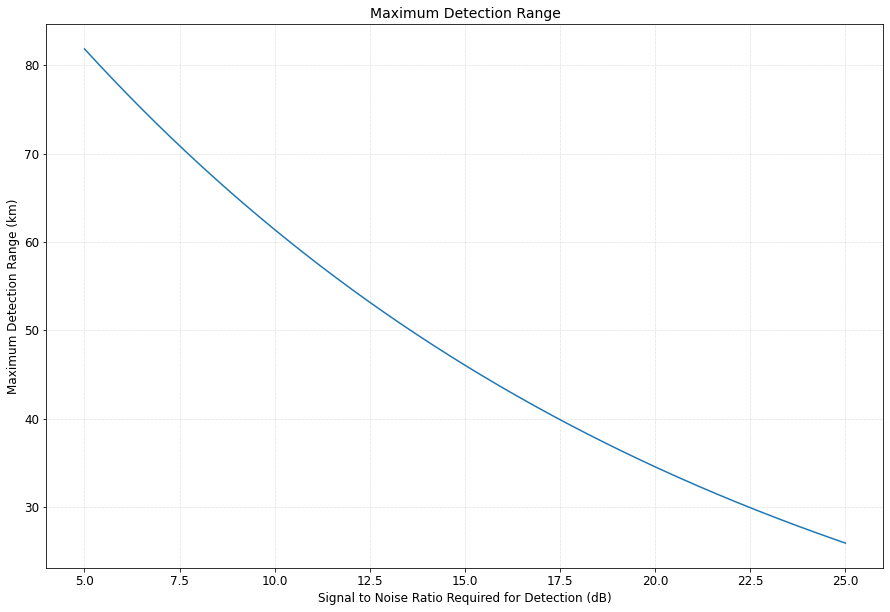

In [43]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.plot(signal_to_noise, max_range / 1.e3)


# Set the plot title and labels

plt.title('Maximum Detection Range', size=14)

plt.xlabel('Signal to Noise Ratio Required for Detection (dB)', size=12)

plt.ylabel('Maximum Detection Range (km)', size=12)


# Set the tick label size and turn on the grid

plt.tick_params(labelsize=12)

plt.grid(linestyle=':', linewidth=0.5)

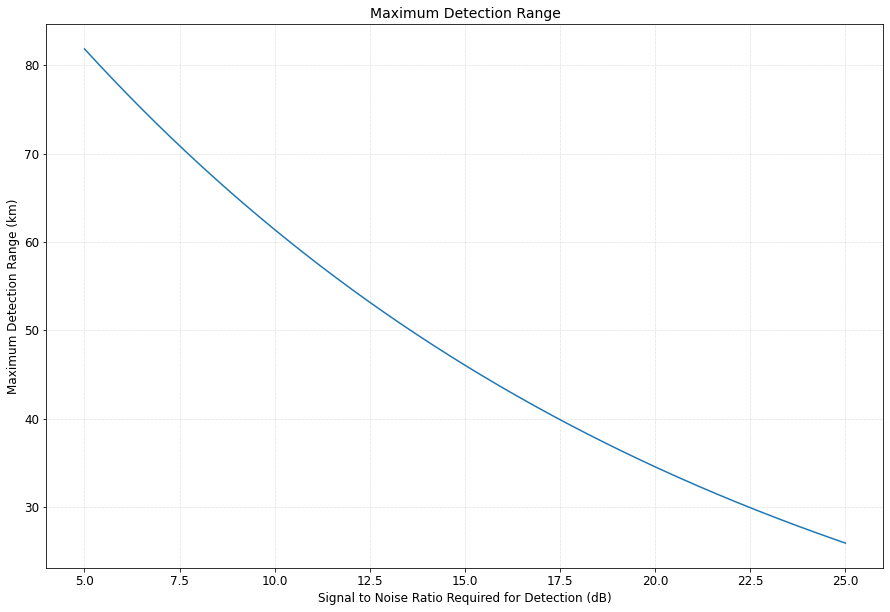

In [46]:
from numpy import linspace

signal_to_noise = linspace(5, 25, 2000)
noise_figure = 3.0
losses       = 3.0    # dB
antenna_gain = 20.0   # dB
target_rcs   = -10.0  # dBsm


kwargs = {'signal_to_noise': 10.0 ** (signal_to_noise / 10.0),
          'system_temperature': 290,
          'bandwidth': 100e3,
          'noise_factor': 10.0 ** (noise_figure / 10.0),
          'losses': 10.0 ** (losses / 10.0),
          'peak_power': 50e3,
          'antenna_gain': 10.0 ** (antenna_gain / 10.0),
          'frequency': 100e6,
          'target_rcs': 10.0 ** (target_rcs / 10.0)}

max_range = radar_range_maximum_range(**kwargs)

from matplotlib import pyplot as plt

# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.plot(signal_to_noise, max_range / 1.e3)


# Set the plot title and labels

plt.title('Maximum Detection Range', size=14)

plt.xlabel('Signal to Noise Ratio Required for Detection (dB)', size=12)

plt.ylabel('Maximum Detection Range (km)', size=12)


# Set the tick label size and turn on the grid

plt.tick_params(labelsize=12)

plt.grid(linestyle=':', linewidth=0.5)

# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Output Signal to Noise Ratio
***

The signal to noise ratio at the output of the receiver is expressed as (Equation 4.37)

$$
{SNR}_o = \frac{P_t\,G^2\,\lambda^2\,\sigma}{(4\pi)^3\,k\,T_0\,B\,F\,r^4}
$$
***

Begin by getting the library path

In [ ]:
import lib_path

Set the target range (m)

In [ ]:
target_min_range = 10e3

target_max_range = 100e3

Import the `linspace` routine from `scipy` for setting up the target range array

In [ ]:
from numpy import linspace

target_range = linspace(target_min_range, target_max_range, 2000)

Set the receiver noise figure (dB)

In [ ]:
 noise_figure = 2.0

Set the radar losses (dB), antenna gain (dB) and the target RCS (dBsm)

In [ ]:
losses = 6.0

antenna_gain = 25

target_rcs = -10

Set up the keyword args

In [ ]:
kwargs = {'target_range': target_range,

          'system_temperature': 300,

          'bandwidth': 10e6,

          'noise_factor': 10.0 ** (noise_figure / 10.0),

          'losses': 10.0 ** (losses / 10.0),

          'peak_power': 100e3,

          'antenna_gain': 10.0 ** (antenna_gain / 10.0),

          'frequency': 1e9,

          'target_rcs': 10.0 ** (target_rcs / 10.0)}

Import the `output_snr` routine

In [ ]:
from Libs.radar_range import radar_range

Calculate the signal to noise ratio at the output of the receiver

In [ ]:
output_snr = radar_range.output_snr(**kwargs)

Import the `matplotlib` routines

In [ ]:
from matplotlib import pyplot as plt

Import the `log10` routine from scipy for displaying the signal to noise ratio in dB

In [ ]:
from numpy import log10

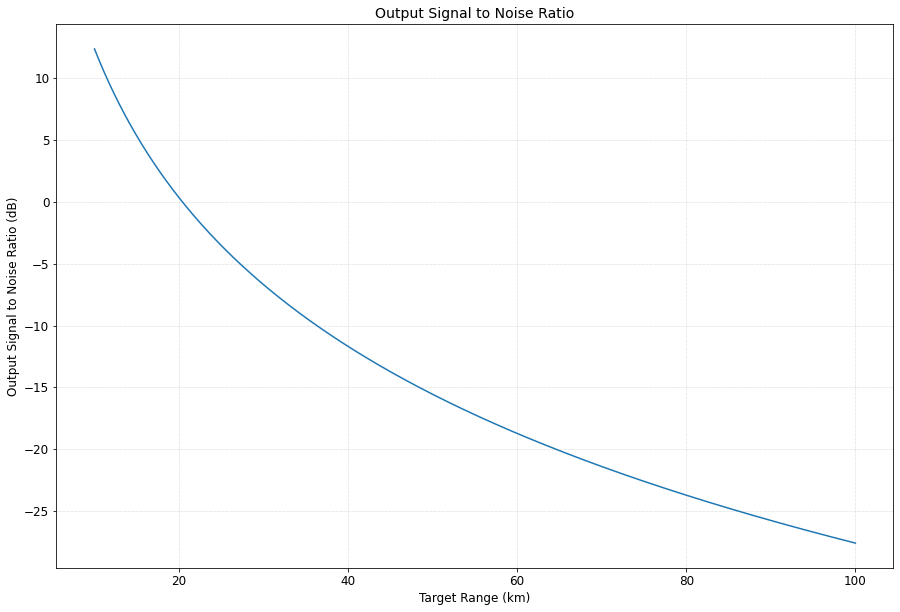

In [ ]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.plot(target_range / 1.0e3, 10.0 * log10(output_snr), '')


# Set the plot title and labels

plt.title('Output Signal to Noise Ratio', size=14)

plt.xlabel('Target Range (km)', size=12)

plt.ylabel('Output Signal to Noise Ratio (dB)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)